<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [17.3 Cubic Spline Interpolation](chapter17.03-Cubic-Spline-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.5 Newton's Polynomial Interpolation](chapter17.05-Newtons-Polynomial-Interpolation.ipynb) >

# Lagrange Polynomial Interpolation

Rather than finding cubic polynomials between subsequent pairs of data points, **Lagrange polynomial interpolation** finds a single polynomial that goes through all the data points. This polynomial is referred to as a **Lagrange polynomial**, $L(x)$, and as an interpolation function, it should have the property $L(x_i) = y_i$ for every point in the data set. For computing Lagrange polynomials, it is useful to write them as a linear combination of **Lagrange basis polynomials**, $P_i(x)$, where
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

and
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Here, $\prod$ means "the product of" or "multiply out."

You will notice that by construction, $P_i(x)$ has the property that $P_i(x_j) = 1$ when $i = j$ and $P_i(x_j) = 0$ when $i \ne j$. Since $L(x)$ is a sum of these polynomials, you can observe that $L(x_i) = y_i$ for every point, exactly as desired.

$$P(x) = L_0(x)f(x_0) + L_1(x)f (x_1) = \frac{x − x_1}{x_0 − x_1}f(x_0) +\frac{x − x_0}{x_1 − x_0}f (x_1).$$



**TRY IT!** Find the Lagrange basis polynomials for the data set *x = [0, 1, 2]* and *y = [1, 3, 2]*. Plot each polynomial and verify the property that $P_i(x_j) = 1$ when $i = j$ and $P_i(x_j) = 0$ when $i \ne j$.


\begin{eqnarray*}
P_1(x) &=& \frac{(x - x_1)(x - x_2)}{(x_0-x_2)(x_0-x_2)} = \frac{(x - 1)(x - 2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2),\\
P_2(x) &=& \frac{(x - x_0)(x - x_2)}{(x_1-x_0)(x_1-x_2)} = \frac{(x - 0)(x - 2)}{(1-0)(1-2)} = -x^2 + 2x,\\
P_3(x) &=& \frac{(x - x_0)(x - x_1)}{(x_2-x_0)(x_2-x_1)} = \frac{(x - 0)(x - 1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x).
\end{eqnarray*}

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
def lagrange_polynomial_basis(X,  x, base, degree):
    n = degree +1
    b = [(x - X[m]) / (X[base] - X[m])
             for m in range(n) if m != base]
    #print(b)
    return np.prod(b, axis=0) 


No handles with labels found to put in legend.


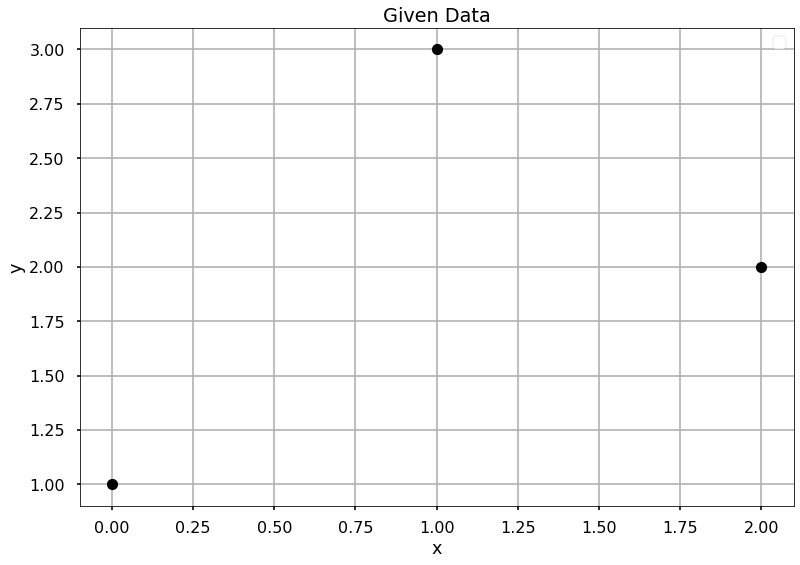

In [3]:
X = [0, 1, 2]
Y = [1, 3, 2]
plt.plot(X, Y, 'ko')
plt.title('Given Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [4]:
from sympy import *
from sympy.abc import x
degree = 1
mx = degree +1
x_1d = []

for i in range(mx) :
        x_1d.append(lagrange_polynomial_basis(X, x, i, 1) )
x_1d = np.asarray(x_1d)
x_1d

array([1 - x, x], dtype=object)

In [5]:
L2 = Y[0]*x_1d[0] + Y[1]*x_1d[1] 
L2

2*x + 1

In [6]:
f_value = [L2.subs(x,X[i]) for i in range(2)]
f_value

[1, 3]


<div class="alert alert-block alert-info">
<b> Question 1:</b> 
    </div>

## Write lagrange linear polynomial for  X[1],X[2]:

In [7]:
degree = 2
mx = degree +1
x_2d = []

for i in range(mx) :
        x_2d.append(lagrange_polynomial_basis(X, x, i, degree) )
        print(x_2d[i]) 
x_2d





(1 - x)*(1 - x/2)
x*(2 - x)
x*(x - 1)/2


[(1 - x)*(1 - x/2), x*(2 - x), x*(x - 1)/2]

In [8]:
x_2d = []
for i in range(mx) :
        x_2d.append(lagrange_polynomial_basis(X, x, i, degree) )
        x_2d[i] = expand(x_2d[i])
        print(x_2d[i])   
              
x_2d = np.asarray(x_2d)



x**2/2 - 3*x/2 + 1
-x**2 + 2*x
x**2/2 - x/2


In [9]:
P=[]
rows, cols = mx,mx
for i in range(rows):
    col = []
    col.append(x_2d[i].coeff(1))
    col.append(x_2d[i].coeff(x))
    col.append(x_2d[i].coeff(x**2))  
    P.append(col)
print(P)    

[[1, -3/2, 1/2], [0, 2, -1], [0, -1/2, 1/2]]


In [10]:
from numpy.polynomial import Polynomial
#P1_coeff = [1,-1.5,.5]
#P2_coeff = [0, 2,-1]
#P3_coeff = [0,-.5,.5]
P1_coeff = P[0]
P2_coeff = P[1]
P3_coeff = P[2]

# get the polynomial function
P1 = Polynomial(P1_coeff)
P2 = Polynomial(P2_coeff)
P3 = Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

**TRY IT!** For the previous example, compute and plot the Lagrange polynomial and verify that it goes through each of the data points.

In [11]:
L = Y[0]*P1 + Y[1]*P2 + Y[2]*P3

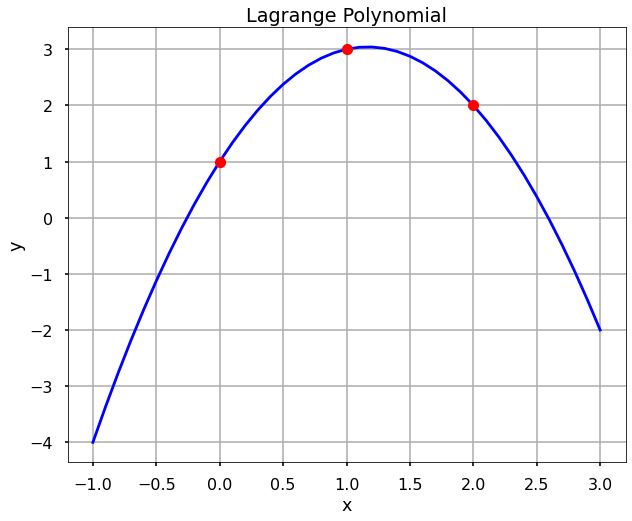

In [12]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', X, Y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**WARNING!** Lagrange interpolation polynomials are defined outside the area of interpolation, that is outside of the interval $[x_1,x_n]$, will grow very fast and unbounded outside this region. This is not a desirable feature because in general, this is not the behavior of the underlying data. Thus, a Lagrange interpolation should never be used to interpolate outside this region.

<div class="alert alert-block alert-info">
<b> Question 2:</b> 
</div>

### Write Lagrangian polynomials degree 3 for:</b> 

The upward velocity of a rocket is given as a function of time in below Table<br>
t(s) v(t)(m/s)<br>
0  0<br>
10 227.04<br>
15 362.78<br>
20 517.35<br>
22.5 602.97<br>
30 901.67


## Using lagrange from scipy

Instead of we calculate everything from scratch, in scipy, we can use the *lagrange* function directly to interpolate the data. Let's see the above example. 

In [13]:
from scipy.interpolate import lagrange

In [14]:
f = lagrange(X, Y)

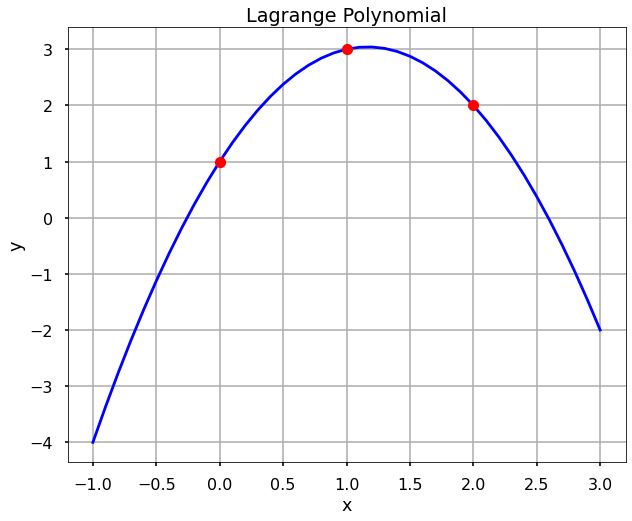

In [15]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', X, Y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<div class="alert alert-block alert-info">
<b> Question 3:</b> 
</div>

### Write Divided Difference Polynomial for:</b> 

The upward velocity of a rocket is given as a function of time in below Table<br>
t(s) v(t)(m/s)<br>
0  0<br>
10 227.04<br>
15 362.78<br>
20 517.35<br>
22.5 602.97<br>
30 901.67


<!--NAVIGATION-->
< [17.3 Cubic Spline Interpolation](chapter17.03-Cubic-Spline-Interpolation.ipynb)  | [Contents](Index.ipynb) | [17.5 Newton's Polynomial Interpolation](chapter17.05-Newtons-Polynomial-Interpolation.ipynb) >